In [1]:
import matplotlib.pyplot as plt
import numpy as np
from utils.objects import GenerationClass
from utils.config import color_maps, ycb_heights
import os
from glob import glob
from scipy import sparse
from PIL import Image
import json
from mani_skill2.envs.pick_and_place.pick_cube import PickCubeEnv
from mani_skill2.utils.sapien_utils import look_at
from mani_skill2.sensors.camera import CameraConfig
from mani_skill2.utils.registration import register_env
from pathlib import Path
import gymnasium as gym
from sapien.core import Pose
import numpy as np
from transforms3d.euler import euler2quat, quat2euler
from utils.config import ycb_heights, color_maps
from glob import glob
from scipy import sparse
from PIL import Image
import json
import os

from IPython.display import clear_output
# save_dir = "../final_data/"
# move_one_dir = os.path.join(save_dir, "move")
# move_cube_dir = os.path.join(move_one_dir, "cube")
# move_ycb_dir = os.path.join(move_one_dir, "ycb")
# os.makedirs(move_one_dir, exist_ok=True)
# os.makedirs(move_cube_dir, exist_ok=True)
# os.makedirs(move_ycb_dir, exist_ok=True)

In [2]:
# model_paths = sorted(glob("../data/mani_skill2_ycb/models/*"), key=lambda x: int(x.split('/')[-1][:3]))
model_paths = sorted(glob("../models/*/mesh.obj"))

gen = GenerationClass(model_paths)

In [3]:
# n = 20
# gen.generate(1, "place_object_in_direction", n)
# gen.generate(3, "place_object_in_direction", n)
# gen.generate(4, "place_object_in_direction", n)

# gen.generate(2, "place_object_on_another", n)
# gen.generate(3, "place_object_on_another", n)
# gen.generate(4, "place_object_on_another", n)

# gen.generate(3, "place_object_in_between", n)

# gen.generate(3, "remove_object", n)

# gen.generate(3, "order_by_color", n)

# gen.generate(2, "move_object", n)

# gen.generate(3, "move_object_toward_another", n)

In [4]:
# from utils.run_tsr import process_images
# from utils.conver_color import convert


# name = "dog"

# # os.removedirs(f"models/{name}")
# process_images([f"../images/{name}.png"], output_dir=f"models/{name}", foreground_ratio=0.7)
# convert(f"../models/{name}/0/mesh.obj", f"../models/{name}")

In [5]:
models = sorted(os.listdir("../models"))

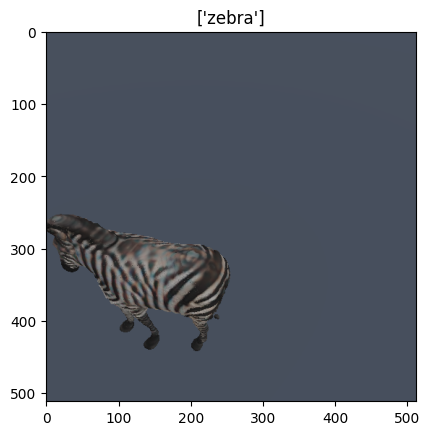

In [10]:
model_heights

{'basket': 0.2101399,
 'bean_bag': 0.2450695,
 'bicycle': 0.20602576,
 'blender': 0.26533362,
 'chair': 0.25081852,
 'chandelier': 0.24378444,
 'cup': 0.21016064,
 'dog': 0.2467341,
 'donut': 0.23817456,
 'ducky': 0.22752494,
 'eiffel_tower': 0.24299057,
 'fountain': 0.1768845,
 'grand_piano': 0.27025518,
 'hourglass': 0.24347751,
 'imgs': -0.83115274,
 'kite': 0.26165235,
 'mirror': 0.26193962,
 'photo_frame': 0.20267123,
 'pot': 0.22206035,
 'sofa': 0.10267718,
 'sunlamp': 0.25989693,
 'swan': 0.24650599,
 'teddy bear': 0.27208704,
 'telephone': 0.23096374,
 'treadmill': 0.20237137,
 'typewriter': 0.24304533,
 'watermelon': 0.26084968,
 'wok': 0.14206947,
 'zebra': 0.2649879}

In [7]:
object_cfgs

[{'name': '../models/chandelier/mesh.obj', 'scale': 1, 'static': False}]

In [6]:
### imported 3d objects

names = [d for d in os.listdir("../models") if d != 'imgs']
name = names[-2]
name = "hourglass"
# for name in names:
@register_env("CustomEnv-v0", max_episode_steps=200, override=True)
class CustomEnv(PickCubeEnv):
    def _load_actors(self):
        self._add_ground(render=self.bg_name is None)
        builder = self._scene.create_actor_builder()
        filepath = f"/home/mkim/Nserver/mix-lab/maniskill2_dev/models/{name}/mesh.obj"
        scale = 0.5
        scale *= self.cube_half_size / 0.01887479572529618
        builder.add_multiple_collisions_from_file(
            filename=filepath, scale=scale, density=1000
        )
        builder.add_visual_from_file(filename=filepath, scale=scale)
        self.obj = builder.build(name=name)
        self.goal_site = self._build_sphere_site(self.goal_thresh)

    def _register_cameras(self):
        pose = look_at([-1, 0, 1], [0, 0, 0])
        return CameraConfig(
            "base_camera", pose.p, pose.q, 512, 512, 1.2, 0.01, 10
        )

env = gym.make("CustomEnv-v0", obs_mode="rgbd", camera_cfgs={"add_segmentation": True})
obs, _ =env.reset()


env.unwrapped.get_articulations()[0].set_pose(Pose([0, 0, 10], [1, 0, 0, 0]))
# quat = euler2quat(np.random.uniform(-np.pi*2, np.pi*2), np.random.uniform(-np.pi*2, np.pi*2), np.random.uniform(-np.pi*2, np.pi*2))
quat = euler2quat(np.pi/2, 0, np.random.uniform(np.pi*3/4, np.pi*5/4))#np.random.uniform(-np.pi*2, np.pi*2))
env.obj.set_pose(Pose([-0.5, 0, 0.5], quat))
# for i in range(10):
for i in range(10):
    obs, _, _, _, _ = env.step(np.zeros(len(env.action_space.sample())))

    img = obs['image']["base_camera"]["rgb"]
    mask = obs['image']["base_camera"]["Segmentation"][..., :3].copy()
    mask[mask != env.obj.id-2] = 0
    mask = np.amax(mask.astype(bool), axis=2)

    img[mask] += 50
    # img[mask] += 25
    img = np.clip(img, 0, 255)
    clear_output(wait=True)
    plt.imshow(img)
    # plt.savefig(f'../models/imgs/{name}')
    plt.show()

KeyboardInterrupt: 

2024-04-03 12:07:09,465 - mani_skill2 - WARNING - Override registered env CustomEnv-v0
[2024-04-03 12:07:09.466] [svulkan2] [warning] A second renderer will share the same internal context with the first one. Arguments passed to constructor will be ignored.


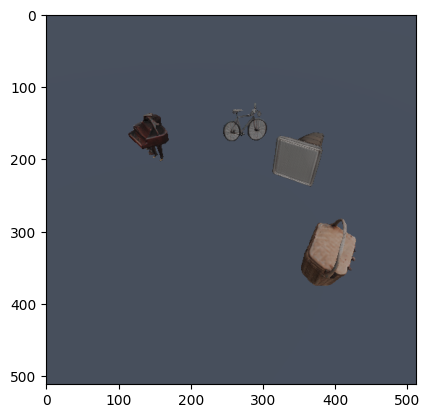

In [7]:
n = 4
for model in models:
    # chosing models
    other_models = [m for m in models if m != model]
    other_model = np.random.choice(other_models, n-1, replace=False)
    other_model = [model] + list(other_model)
    obj_cfgs, camera_cfgs = gen.model_configs(n, other_model)
    env = gen.get_env(obj_cfgs, camera_cfgs)

    gen.initialize_positions(n, obj_cfgs)
    obs, _, _, _, _ = env.step(np.zeros(len(env.action_space.sample())))

    img = obs['image']["base_camera"]["rgb"]
    plt.imshow(img)
    plt.show()
    break